In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

  

In [2]:
Datos = pd.read_csv('./Titanic-Dataset.csv')

In [3]:
Datos.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
columnas_a_eliminar = ['Name', 'Ticket', 'Cabin', 'Fare', 'Embarked' ]

# Filtra las columnas que realmente existen en el Dataset
columnas_presentes = [col for col in columnas_a_eliminar if col in Datos.columns]

# Elimina las columnas especificadas que están presentes
if columnas_presentes:
    Datos = Datos.drop(columns=columnas_presentes)
    print(f"Columnas eliminadas: {columnas_presentes}")
else:
    print("Las columnas a eliminar no existen en el Dataset.")

Columnas eliminadas: ['Name', 'Ticket', 'Cabin', 'Fare', 'Embarked']


In [5]:
print(Datos.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')


In [6]:
Datos.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
5,6,0,3,male,NaN,0,0
6,7,0,1,male,54.0,0,0
7,8,0,3,male,2.0,3,1
8,9,1,3,female,27.0,0,2
9,10,1,2,female,14.0,1,0


In [7]:
Datos.shape

(891, 7)

In [8]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 48.9+ KB


In [9]:
# Reemplazamos los valores nulos por la mediana en las columnas numéricas
Datos_numericos = Datos.select_dtypes(include=['number'])

Datos_numericos = Datos_numericos.apply(lambda x: x.fillna(x.median()), axis=0)

Datos.update(Datos_numericos)

In [10]:
# Reemplazamos los valores nulos por la moda en las columnas de texto 
def fill_mode(Datos):
    # Iterar sobre todas las columnas de texto
    for column in Datos.select_dtypes(include=['object']).columns:
        # Encontrar la moda de la columna
        mode = Datos[column].mode()
        if not mode.empty:
            mode_value = mode[0]
            # Rellenar los NaN con la moda
            Datos[column].fillna(mode_value, inplace=True)
    return Datos

# Aplicar la función al Dataset
Datos_filled = fill_mode(Datos)

# Imprimir para verificar
print(Datos_filled.head(20))

    PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch
0             1         0       3    male  22.0      1      0
1             2         1       1  female  38.0      1      0
2             3         1       3  female  26.0      0      0
3             4         1       1  female  35.0      1      0
4             5         0       3    male  35.0      0      0
5             6         0       3    male  28.0      0      0
6             7         0       1    male  54.0      0      0
7             8         0       3    male   2.0      3      1
8             9         1       3  female  27.0      0      2
9            10         1       2  female  14.0      1      0
10           11         1       3  female   4.0      1      1
11           12         1       1  female  58.0      0      0
12           13         0       3    male  20.0      0      0
13           14         0       3    male  39.0      1      5
14           15         0       3  female  14.0      0      0
15      

In [11]:
Datos.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
5,6,0,3,male,28.0,0,0
6,7,0,1,male,54.0,0,0
7,8,0,3,male,2.0,3,1
8,9,1,3,female,27.0,0,2
9,10,1,2,female,14.0,1,0


In [12]:
Survived_counts=Datos['Survived'].value_counts()
Survived_counts

Survived
0    549
1    342
Name: count, dtype: int64

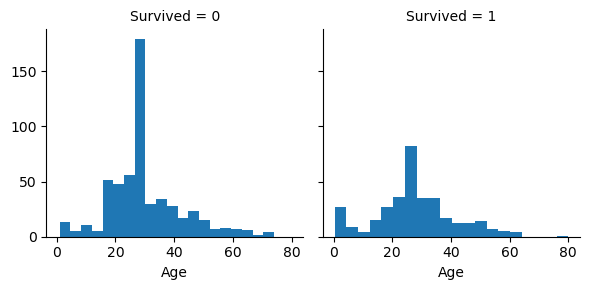

In [14]:
Age=sns.FacetGrid(Datos,col='Survived')
Age.map(plt.hist,'Age',bins=20)

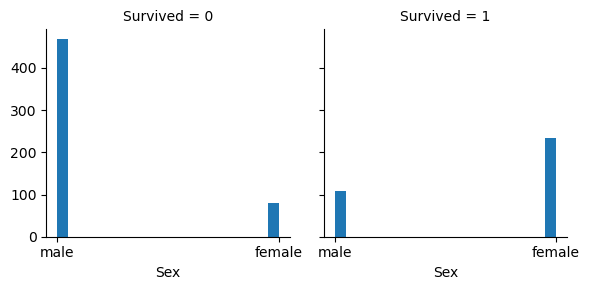

In [15]:
Sex=sns.FacetGrid(Datos,col='Survived')
Sex.map(plt.hist,'Sex',bins=20)

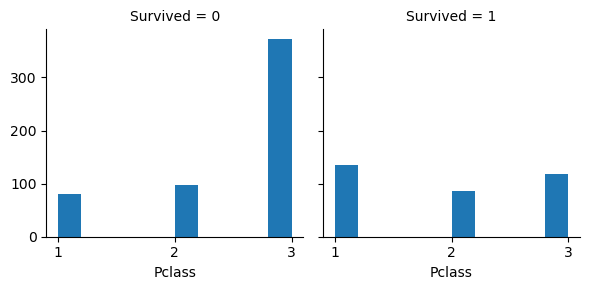

In [16]:
Pclass=sns.FacetGrid(Datos,col='Survived')
plt.xticks([1,2,3])
Pclass.map(plt.hist,'Pclass')

(array([314.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 577.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

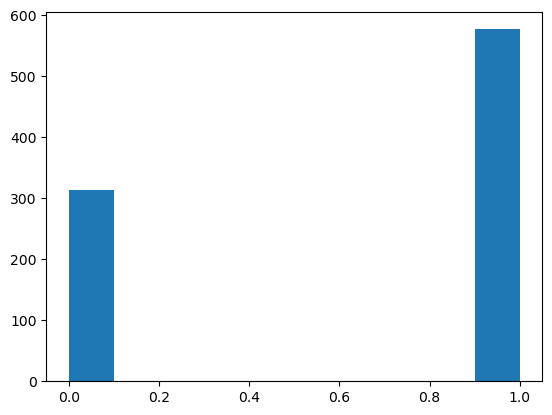

In [18]:
plt.hist(Datos.Sex)

In [19]:
X = Datos.drop('Survived',axis=1)
Y = Datos['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)

In [20]:
print (X_train)

     PassengerId  Pclass  Sex   Age  SibSp  Parch
671          672       1    1  31.0      1      0
417          418       2    0  18.0      0      2
634          635       3    0   9.0      3      2
323          324       2    0  22.0      1      1
379          380       3    1  19.0      0      0
..           ...     ...  ...   ...    ...    ...
131          132       3    1  20.0      0      0
490          491       3    1  28.0      1      0
528          529       3    1  39.0      0      0
48            49       3    1  28.0      2      0
80            81       3    1  22.0      0      0

[668 rows x 6 columns]


In [21]:
print (Y_train)

671    0
417    1
634    0
323    1
379    0
      ..
131    0
490    0
528    0
48     0
80     0
Name: Survived, Length: 668, dtype: int64


In [22]:
modelo_regresion = LogisticRegression(solver = "liblinear") 
modelo_regresion.fit (X_train , Y_train)   

# Crea el modelo de prediccion
Prediccion = modelo_regresion.predict(X_test)

In [23]:
print (Y_test)

288    1
869    1
182    0
684    0
599    1
      ..
882    0
434    0
304    0
500    0
633    0
Name: Survived, Length: 223, dtype: int64


In [24]:
print (Prediccion)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0
 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0]


In [25]:
# Desempeño del modelo de regresión
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       137
           1       0.79      0.64      0.71        86

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223



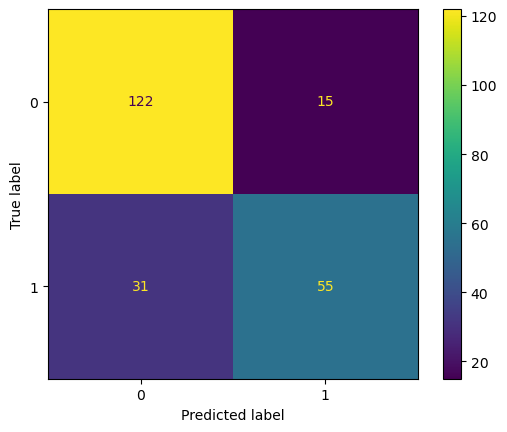

In [26]:
#Matrix de Confusión del modelo

cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

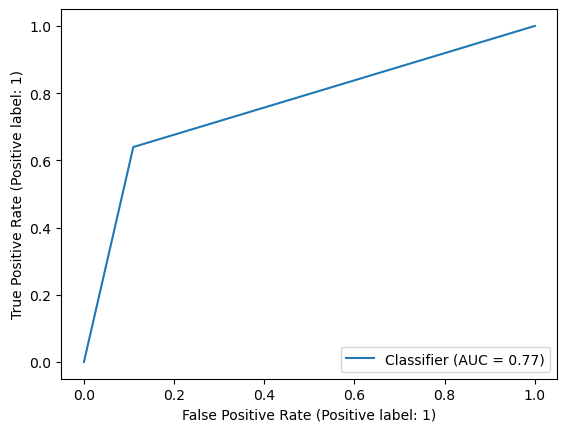

In [27]:
# Curva de precisón del modelo

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()

**Rendimiento del modelo en términos de precisión**

Precision: Para la clase 0, la precisión es del 80%, lo que significa que el 80% de las predicciones clasificadas como clase 0 fueron correctas. Para la clase 1, la precisión es del 79%, lo que indica que el 79% de las predicciones clasificadas como clase 1 fueron correctas.


Recall:Para la clase 0, el recall es del 89%, lo que significa que el 89% de las instancias que realmente pertenecen a la clase 0 fueron correctamente identificadas por el modelo. Para la clase 1, el recall es del 64%, lo que indica que el 64% de las instancias que realmente pertenecen a la clase 1 fueron correctamente identificadas por el modelo.

F1-score: El F1-score es una métrica que combina precision y recall en una sola medida. Es útil cuando hay un desequilibrio entre las clases.Para la clase 0, el F1-score es del 84%, y para la clase 1, el F1-score es del 71%.

Support:Support indica el número de instancias en cada clase en el conjunto de datos de prueba. Para la clase 0, hay 137 instancias y para la clase 1, hay 86 instancias.

Accuracy: La precisión global del modelo, calculada como el número de predicciones correctas sobre el total de predicciones realizadas por el modelo. En este caso, la precisión global del modelo es del 79%.


**De la Matriz de Confusión se puede interpretar:**

Verdaderos Negativos: Son 122 observaciones que el clasificador predijo correctamente como falsas. Esto significa que el clasificador identificó correctamente que estas observaciones no pertenecen a la clase de interés.

Verdaderos Positivos: Son 55 observaciones que el clasificador predijo correctamente como verdaderas. Esto indica que el clasificador identificó correctamente que estas observaciones pertenecen a la clase de interés.

Falsos Positivos: Son 15 observaciones que el clasificador predijo incorrectamente como verdaderas. Aunque estas observaciones no pertenecen a la clase de interés, el clasificador las etiquetó erróneamente como si lo fueran.

Falsos Negativos: Son 31 observaciones que el clasificador predijo incorrectamente como falsas. Estas observaciones pertenecen a la clase de interés, pero el clasificador no las identificó correctamente.


**De la curva de precisión del modelo podemos interpretar:**

El AUC es 0,77 lo que significa que el 77 % de las predicciones del clasificador son correctas en todos los umbrales de clasificación.de clasificación.te.